In [1]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal     import seasonal_decompose, STL
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import  mean_squared_error
from   datetime                           import  datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing , Holt

In [24]:
df_train = pd.read_csv('train_.csv')

In [25]:
date = pd.date_range(start='01/01/1749', end='12/31/2010', freq='M')

In [26]:
df_train['Month-Year']=date

In [27]:
df_train=df_train.set_index('Month-Year')

In [28]:
df_train = df_train.drop('Month',axis=1)

In [37]:
df_test = pd.read_csv('test_.csv')

In [38]:
date = pd.date_range(start='01/01/2011', end='12/31/2020', freq='M')

In [39]:
df_test['Month-Year']=date

In [40]:
df_test=df_test.set_index('Month-Year')

In [41]:
df_test = df_test.drop('Month',axis=1)

In [42]:
df = pd.concat([df_train,df_test],axis=1)

In [43]:
df.shape

(3264, 1)

In [44]:
df

,Avg_sunspot_count
Month-Year,
1749-01-31,97.0
1749-02-28,104.0
1749-03-31,117.0
1749-04-30,93.0
1749-05-31,142.0
...,...
2020-08-31,NaN
2020-09-30,NaN
2020-10-31,NaN


In [45]:
model = ARIMA(df_train, order=(3,0,2))
results_Arima = model.fit()
print(results_Arima.summary())

C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Avg_sunspot_count   No. Observations:                 3144
Model:                 ARIMA(3, 0, 2)   Log Likelihood              -14549.017
Date:                Sun, 14 Aug 2022   AIC                          29112.033
Time:                        13:07:33   BIC                          29154.406
Sample:                    01-31-1749   HQIC                         29127.238
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.9533      6.032     13.752      0.000      71.130      94.776
ar.L1          2.3221      0.020    116.090      0.000       2.283       2.361
ar.L2         -1.6631      0.040    -41.634      0.0

In [46]:
ARIMA_predictions=results_Arima.forecast(len(df_test))

In [47]:
ARIMA_predictions

2011-01-31    35.007177
2011-02-28    40.173137
2011-03-31    43.688540
2011-04-30    46.655621
2011-05-31    49.451859
                ...    
2020-08-31    66.925711
2020-09-30    67.283697
2020-10-31    67.674135
2020-11-30    68.095292
2020-12-31    68.545391
Freq: M, Name: predicted_mean, Length: 120, dtype: float64

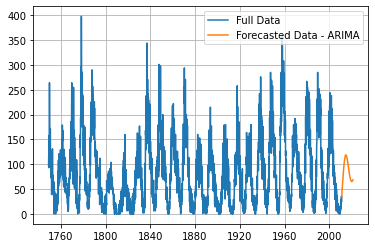

In [48]:
plt.plot(df_train,label='Full Data')
#plt.plot(test,label='Test Data')
plt.plot(df_test.index,ARIMA_predictions,label='Forecasted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [57]:
pd.DataFrame({'Month':ARIMA_predictions.index, 'Avg_sunspot_count':ARIMA_predictions.values})

,Month,Avg_sunspot_count
0,2011-01-31,35.007177
1,2011-02-28,40.173137
2,2011-03-31,43.688540
3,2011-04-30,46.655621
4,2011-05-31,49.451859
...,...,...
115,2020-08-31,66.925711
116,2020-09-30,67.283697
117,2020-10-31,67.674135
118,2020-11-30,68.095292


In [58]:
pd.DataFrame({'Month':ARIMA_predictions.index, 'Avg_sunspot_count':ARIMA_predictions.values}).to_csv('SourabhKumar_Submission1.csv', header  = ['Month','Avg_sunspot_count'])

## second submission

In [59]:
model = ARIMA(df_train, order=(13,0,6))
results_Arima = model.fit()
print(results_Arima.summary())

C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:      Avg_sunspot_count   No. Observations:                 3144
Model:                ARIMA(13, 0, 6)   Log Likelihood              -14558.026
Date:                Sun, 14 Aug 2022   AIC                          29158.051
Time:                        13:26:58   BIC                          29285.170
Sample:                    01-31-1749   HQIC                         29203.666
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.9943      5.456     15.212      0.000      72.301      93.688
ar.L1         -0.7467      0.145     -5.153      0.000      -1.031      -0.463
ar.L2          0.0005      0.104      0.005      0.9

In [60]:
ARIMA_predictions=results_Arima.forecast(len(df_test))

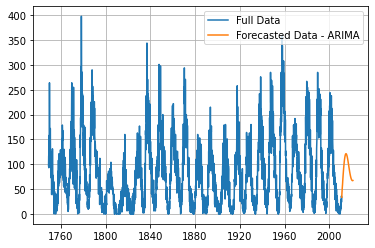

In [61]:
plt.plot(df_train,label='Full Data')
#plt.plot(test,label='Test Data')
plt.plot(df_test.index,ARIMA_predictions,label='Forecasted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [62]:
pd.DataFrame({'Month':ARIMA_predictions.index, 'Avg_sunspot_count':ARIMA_predictions.values}).to_csv('SourabhKumar_Submission2.csv', header  = ['Month','Avg_sunspot_count'])

#### 3rd submission

In [63]:
model = sm.tsa.statespace.SARIMAX(df_train,
                                order=(3,0,2),
                                seasonal_order=(3,0,2,12),
                                )
model_Sarima = model.fit()
print(model_Sarima.summary())

C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                  Avg_sunspot_count   No. Observations:                 3144
Model:             SARIMAX(3, 0, 2)x(3, 0, 2, 12)   Log Likelihood              -14607.933
Date:                            Sun, 14 Aug 2022   AIC                          29237.867
Time:                                    14:41:20   BIC                          29304.452
Sample:                                01-31-1749   HQIC                         29261.760
                                     - 12-31-2010                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0593      0.339      3.121      0.002       0.394       1.725
ar.L2         -0.0840      0.427   

In [65]:
pred_start=df_test.index[0]
pred_end=df_test.index[-1]

In [66]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

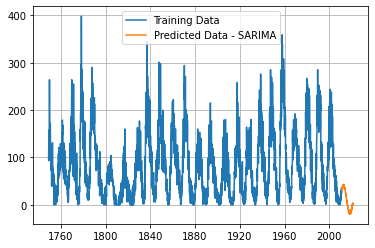

In [67]:
plt.plot(df_train,label='Training Data')
plt.plot(df_test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [69]:
pd.DataFrame({'Month':SARIMA_predictions.index, 'Avg_sunspot_count':SARIMA_predictions.values}).to_csv('SourabhKumar_Submission3.csv', header  = ['Month','Avg_sunspot_count'])

#### 4th submission

In [70]:
model = sm.tsa.statespace.SARIMAX(df_train,
                                order=(1,0,1),
                                seasonal_order=(1,1,2,12),
                                )
model_Sarima = model.fit()
print(model_Sarima.summary())

C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                       Avg_sunspot_count   No. Observations:                 3144
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood              -14622.322
Date:                                 Sun, 14 Aug 2022   AIC                          29256.643
Time:                                         15:33:57   BIC                          29292.940
Sample:                                     01-31-1749   HQIC                         29269.671
                                          - 12-31-2010                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9777      0.003    293.512      0.000       0.971       0

In [71]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

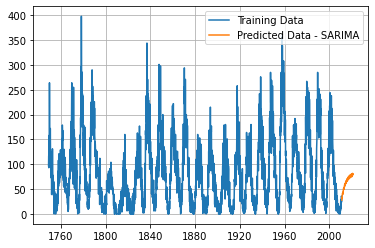

In [72]:
plt.plot(df_train,label='Training Data')
plt.plot(df_test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [73]:
pd.DataFrame({'Month':SARIMA_predictions.index, 'Avg_sunspot_count':SARIMA_predictions.values}).to_csv('SourabhKumar_Submission4.csv', header  = ['Month','Avg_sunspot_count'])

### 5th submission ARIMA model

In [75]:
model = ARIMA(df_train, order=(14,0,1))
results_Arima = model.fit()
print(results_Arima.summary())

C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Avg_sunspot_count   No. Observations:                 3144
Model:                ARIMA(14, 0, 1)   Log Likelihood              -14539.202
Date:                Sun, 14 Aug 2022   AIC                          29112.405
Time:                        16:47:28   BIC                          29215.310
Sample:                    01-31-1749   HQIC                         29149.331
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.9519      5.552     14.941      0.000      72.070      93.834
ar.L1          1.4353      0.021     68.976      0.000       1.395       1.476
ar.L2         -0.3841      0.026    -15.001      0.0

In [81]:
ARIMA_predictions=results_Arima.forecast(len(df_test))

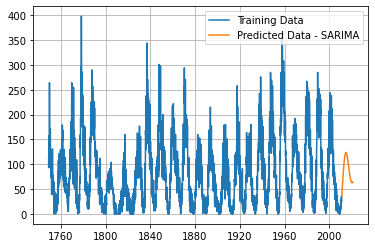

In [82]:
plt.plot(df_train,label='Training Data')
plt.plot(df_test,label='Test Data')
plt.plot(test.index,ARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [83]:
pd.DataFrame({'Month':ARIMA_predictions.index, 'Avg_sunspot_count':ARIMA_predictions.values}).to_csv('SourabhKumar_Submission5.csv', header  = ['Month','Avg_sunspot_count'])

In [84]:
ARIMA_predictions

2011-01-31    35.356098
2011-02-28    40.323328
2011-03-31    43.532891
2011-04-30    45.912533
2011-05-31    49.246376
                ...    
2020-08-31    63.146452
2020-09-30    63.358353
2020-10-31    63.611383
2020-11-30    63.904099
2020-12-31    64.234994
Freq: M, Name: predicted_mean, Length: 120, dtype: float64

### 6th submission - best score submission -  48.63

In [85]:
model = sm.tsa.statespace.SARIMAX(df_train,
                                order=(2,0,2),
                                seasonal_order=(2,0,2,6),
                                )
model_Sarima = model.fit()
print(model_Sarima.summary())

C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                 Avg_sunspot_count   No. Observations:                 3144
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 6)   Log Likelihood              -14632.935
Date:                           Sun, 14 Aug 2022   AIC                          29283.871
Time:                                   16:58:53   BIC                          29338.350
Sample:                               01-31-1749   HQIC                         29303.420
                                    - 12-31-2010                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0006      0.122      8.194      0.000       0.761       1.240
ar.L2         -0.0133      0.120     -0.111

In [86]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

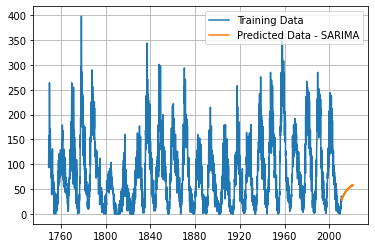

In [87]:
plt.plot(df_train,label='Training Data')
plt.plot(df_test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [88]:
pd.DataFrame({'Month':SARIMA_predictions.index, 'Avg_sunspot_count':SARIMA_predictions.values}).to_csv('SourabhKumar_Submission6.csv', header  = ['Month','Avg_sunspot_count'])

### 7th submission

In [90]:
y_hat_sma = df.copy()
ma_window = 75
y_hat_sma['sma_forecast'] = df['Avg_sunspot_count'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][3144:] = y_hat_sma['sma_forecast'][3144-1]

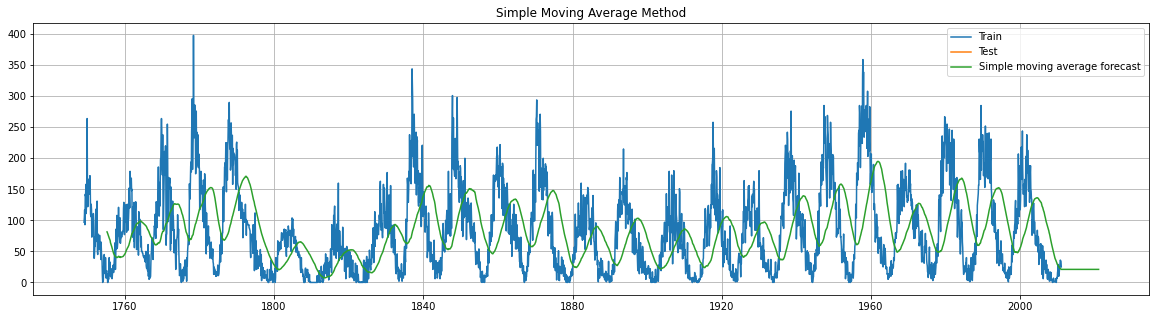

In [94]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Avg_sunspot_count'], label='Train')
plt.plot(test['Avg_sunspot_count'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [99]:
pd.DataFrame({'Month':SARIMA_predictions.index, 'Avg_sunspot_count':y_hat_sma['sma_forecast'][3144:]}).to_csv('SourabhKumar_Submission7.csv', header  = ['Month','Avg_sunspot_count'])

#### 10th submission

In [111]:
model = ARIMA(df_train, order=(5,0,1))
results_Arima = model.fit()
print(results_Arima.summary())

C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Avg_sunspot_count   No. Observations:                 3144
Model:                 ARIMA(5, 0, 1)   Log Likelihood              -14623.527
Date:                Sun, 14 Aug 2022   AIC                          29263.055
Time:                        17:50:40   BIC                          29311.481
Sample:                    01-31-1749   HQIC                         29280.432
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.9911     15.617      5.314      0.000      52.382     113.600
ar.L1          0.9972      0.158      6.302      0.000       0.687       1.307
ar.L2         -0.1301      0.092     -1.408      0.1

In [112]:
ARIMA_predictions=results_Arima.forecast(len(df_test))

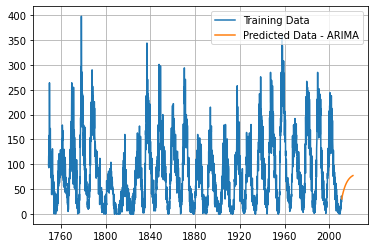

In [113]:
plt.plot(df_train,label='Training Data')
plt.plot(df_test,label='Test Data')
plt.plot(test.index,ARIMA_predictions,label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [114]:
pd.DataFrame({'Month':ARIMA_predictions.index, 'Avg_sunspot_count':ARIMA_predictions.values}).to_csv('SourabhKumar_Submission10.csv', header  = ['Month','Avg_sunspot_count'])

### 11th submission -best so far - 44.56

In [118]:
model = sm.tsa.statespace.SARIMAX(df_train,
                                order=(2,1,4),
                                seasonal_order=(0,1,1,7),
                                )
model_Sarima = model.fit()
print(model_Sarima.summary())

C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                   Avg_sunspot_count   No. Observations:                 3144
Model:             SARIMAX(2, 1, 4)x(0, 1, [1], 7)   Log Likelihood              -14587.237
Date:                             Sun, 14 Aug 2022   AIC                          29190.473
Time:                                     18:09:10   BIC                          29238.879
Sample:                                 01-31-1749   HQIC                         29207.845
                                      - 12-31-2010                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3863      0.123     11.294      0.000       1.146       1.627
ar.L2         -0.4524      

In [119]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

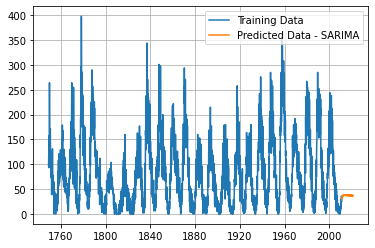

In [120]:
plt.plot(df_train,label='Training Data')
plt.plot(df_test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [121]:
pd.DataFrame({'Month':SARIMA_predictions.index, 'Avg_sunspot_count':SARIMA_predictions.values}).to_csv('SourabhKumar_Submission11.csv', header  = ['Month','Avg_sunspot_count'])

### 12th submission

In [123]:
model = sm.tsa.statespace.SARIMAX(df_train,
                                order=(3,1,1),
                                seasonal_order=(0,1,1,43),
                                )
model_Sarima = model.fit()
print(model_Sarima.summary())

C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                  Avg_sunspot_count   No. Observations:                 3144
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 43)   Log Likelihood              -14529.258
Date:                            Sun, 14 Aug 2022   AIC                          29070.515
Time:                                    18:19:25   BIC                          29106.750
Sample:                                01-31-1749   HQIC                         29083.527
                                     - 12-31-2010                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0857      0.060      1.417      0.156      -0.033       0.204
ar.L2         -0.0903      0.027   

In [124]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

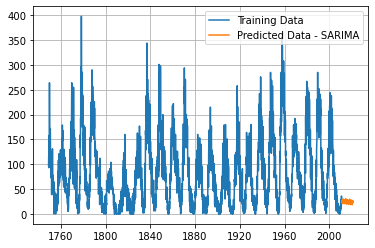

In [125]:
plt.plot(df_train,label='Training Data')
plt.plot(df_test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [126]:
pd.DataFrame({'Month':SARIMA_predictions.index, 'Avg_sunspot_count':SARIMA_predictions.values}).to_csv('SourabhKumar_Submission12.csv', header  = ['Month','Avg_sunspot_count'])

### 13th submission

In [129]:
model = sm.tsa.statespace.SARIMAX(df_train,
                                order=(1,0,1),
                                seasonal_order=(1,1,2,43),
                                )
model_Sarima = model.fit()
print(model_Sarima.summary())

C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                       Avg_sunspot_count   No. Observations:                 3144
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 43)   Log Likelihood              -14545.926
Date:                                 Sun, 14 Aug 2022   AIC                          29103.851
Time:                                         18:40:07   BIC                          29140.088
Sample:                                     01-31-1749   HQIC                         29116.864
                                          - 12-31-2010                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9783      0.003    294.130      0.000       0.972       0

In [130]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

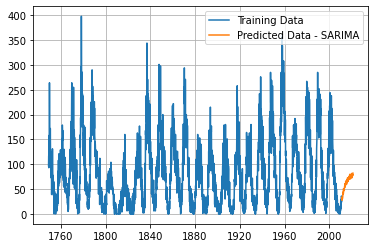

In [131]:
plt.plot(df_train,label='Training Data')
plt.plot(df_test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [132]:
pd.DataFrame({'Month':SARIMA_predictions.index, 'Avg_sunspot_count':SARIMA_predictions.values}).to_csv('SourabhKumar_Submission13.csv', header  = ['Month','Avg_sunspot_count'])

### 14th submission - best score - 43.74

In [137]:
model = sm.tsa.statespace.SARIMAX(df_train,
                                order=(3,1,4),
                                seasonal_order=(0,1,1,7),
                                )
model_Sarima = model.fit()
print(model_Sarima.summary())

C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                   Avg_sunspot_count   No. Observations:                 3144
Model:             SARIMAX(3, 1, 4)x(0, 1, [1], 7)   Log Likelihood              -14584.785
Date:                             Sun, 14 Aug 2022   AIC                          29187.569
Time:                                     18:56:59   BIC                          29242.026
Sample:                                 01-31-1749   HQIC                         29207.113
                                      - 12-31-2010                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4723      2.300      0.205      0.837      -4.036       4.981
ar.L2          0.8921      

In [138]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

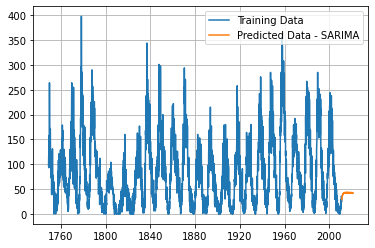

In [139]:
plt.plot(df_train,label='Training Data')
plt.plot(df_test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [140]:
pd.DataFrame({'Month':SARIMA_predictions.index, 'Avg_sunspot_count':SARIMA_predictions.values}).to_csv('SourabhKumar_Submission14.csv', header  = ['Month','Avg_sunspot_count'])

In [144]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 7)
Model: (0, 1, 1)(0, 1, 2, 7)
Model: (0, 1, 2)(0, 1, 3, 7)
Model: (0, 1, 2)(1, 1, 0, 7)


In [145]:
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


In [146]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(df_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 1, 0, 7)7 - AIC:32018.179606555434


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 1, 1, 7)7 - AIC:29687.090326934434


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 1, 2, 7)7 - AIC:29639.345526994955


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 1, 3, 7)7 - AIC:29551.96398189615


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 1, 0, 7)7 - AIC:30919.93203324264


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 1, 1, 7)7 - AIC:29688.496563731427


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 1, 2, 7)7 - AIC:29636.61109218724


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 1, 3, 7)7 - AIC:29553.951819760037


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(2, 1, 0, 7)7 - AIC:30532.35479966202


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(2, 1, 1, 7)7 - AIC:29644.921456034994


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(2, 1, 2, 7)7 - AIC:29629.379546848904


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 1, 3, 7)7 - AIC:29555.935591890968


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(3, 1, 0, 7)7 - AIC:30260.565471157814


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(3, 1, 1, 7)7 - AIC:29559.450473958394


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(3, 1, 2, 7)7 - AIC:29561.365806821414


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(3, 1, 3, 7)7 - AIC:29554.82688236657


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 1, 0, 7)7 - AIC:31472.47063319178


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 1, 1, 7)7 - AIC:29197.304307446815


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 1, 2, 7)7 - AIC:29146.214963134375


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 1, 3, 7)7 - AIC:29057.98151110291


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 0, 7)7 - AIC:30337.089810672976


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 1, 7)7 - AIC:29199.0351677159


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 2, 7)7 - AIC:29142.534322493662


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 3, 7)7 - AIC:29059.567405982358


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 1, 0, 7)7 - AIC:29987.66130743285


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 1, 1, 7)7 - AIC:29147.734151140692


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 1, 2, 7)7 - AIC:29130.875398099575


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 1, 3, 7)7 - AIC:29058.979182453997


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(3, 1, 0, 7)7 - AIC:29767.887561610616


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(3, 1, 1, 7)7 - AIC:29075.724948795352


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(3, 1, 2, 7)7 - AIC:29077.719201208398


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 1, 3, 7)7 - AIC:29059.19197412197


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(0, 1, 0, 7)7 - AIC:31255.31809976994


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(0, 1, 1, 7)7 - AIC:29137.238396919343


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(0, 1, 2, 7)7 - AIC:29082.789743372297


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(0, 1, 3, 7)7 - AIC:28999.179204228385


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(1, 1, 0, 7)7 - AIC:30239.152754011855


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(1, 1, 1, 7)7 - AIC:29139.23245409205


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(1, 1, 2, 7)7 - AIC:29073.61507790379


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(1, 1, 3, 7)7 - AIC:29000.855632689207


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 1, 0, 7)7 - AIC:29905.976047751785


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 1, 1, 7)7 - AIC:29096.656395939426


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 1, 2, 7)7 - AIC:29067.643395472882


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 1, 3, 7)7 - AIC:29000.010124995046


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(3, 1, 0, 7)7 - AIC:29687.56038359439


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(3, 1, 1, 7)7 - AIC:29025.96449582065


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(3, 1, 2, 7)7 - AIC:29027.958556238867


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(3, 1, 3, 7)7 - AIC:29002.011074260918


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(0, 1, 0, 7)7 - AIC:31189.33872879496


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(0, 1, 1, 7)7 - AIC:29133.501703202714


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(0, 1, 2, 7)7 - AIC:29074.732773076536


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(0, 1, 3, 7)7 - AIC:28993.251931258023


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(1, 1, 0, 7)7 - AIC:30233.156187358167


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(1, 1, 1, 7)7 - AIC:29135.49801300012


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(1, 1, 2, 7)7 - AIC:29065.702349980405


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 1, 3, 7)7 - AIC:28995.57481376136


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(2, 1, 0, 7)7 - AIC:29906.77553273445


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(2, 1, 1, 7)7 - AIC:29098.600789624958


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(2, 1, 2, 7)7 - AIC:29059.63871420153


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 1, 3, 7)7 - AIC:28992.767213708208


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(3, 1, 0, 7)7 - AIC:29689.140644849424


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(3, 1, 1, 7)7 - AIC:29027.92158396181


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 1, 2, 7)7 - AIC:29029.933103652285


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 1, 3, 7)7 - AIC:28994.011441022165


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 1, 0, 7)7 - AIC:31727.46965370949


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 1, 1, 7)7 - AIC:29391.54172929666


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 1, 2, 7)7 - AIC:29339.0086676614


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 1, 3, 7)7 - AIC:29254.0948611285


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 0, 7)7 - AIC:30590.36913198514


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 1, 7)7 - AIC:29392.781799140044


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 2, 7)7 - AIC:29336.83825984247


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 3, 7)7 - AIC:29255.84841765943


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(2, 1, 0, 7)7 - AIC:30217.020155278886


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(2, 1, 1, 7)7 - AIC:29339.458666599443


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(2, 1, 2, 7)7 - AIC:29336.99377686884


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 1, 3, 7)7 - AIC:29269.733338948838


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(3, 1, 0, 7)7 - AIC:29974.21760842102


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(3, 1, 1, 7)7 - AIC:29253.217330064123


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(3, 1, 2, 7)7 - AIC:29255.021704711227


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(3, 1, 3, 7)7 - AIC:29256.265967192867


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 0, 7)7 - AIC:31209.984813286996


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 1, 7)7 - AIC:29152.051860340755


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 2, 7)7 - AIC:29102.41465592401


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 3, 7)7 - AIC:29011.72501651389


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 0, 7)7 - AIC:30222.96868631833


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 1, 7)7 - AIC:29154.044046096467


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 2, 7)7 - AIC:29099.168036242416


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 3, 7)7 - AIC:29013.487424728773


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 1, 0, 7)7 - AIC:29898.98732465157


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 1, 1, 7)7 - AIC:29091.7607089586


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 1, 2, 7)7 - AIC:29084.485098348458


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 1, 3, 7)7 - AIC:29013.290106944638


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(3, 1, 0, 7)7 - AIC:29684.24580477946


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(3, 1, 1, 7)7 - AIC:29022.16557126299


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 1, 2, 7)7 - AIC:29024.14544663018


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 1, 3, 7)7 - AIC:29014.579781479057


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(0, 1, 0, 7)7 - AIC:31181.62013146226


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 1, 1, 7)7 - AIC:29156.38803360121


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 1, 2, 7)7 - AIC:29108.387378596737


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 1, 3, 7)7 - AIC:29095.33593160069


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 1, 0, 7)7 - AIC:30224.57378837998


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 1, 7)7 - AIC:29141.228278255978


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 2, 7)7 - AIC:29129.72231724612


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 3, 7)7 - AIC:29040.142202742885


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 1, 0, 7)7 - AIC:29897.844952626074


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 1, 1, 7)7 - AIC:29126.762950012468


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 1, 2, 7)7 - AIC:29109.835068129276


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 1, 3, 7)7 - AIC:29044.946929184505


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(3, 1, 0, 7)7 - AIC:29680.23904140795


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 1, 7)7 - AIC:29107.859575988903


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 2, 7)7 - AIC:29091.929714844315


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 3, 7)7 - AIC:29056.308058492334


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(0, 1, 0, 7)7 - AIC:31114.603417710023


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 1, 1, 7)7 - AIC:29138.228480331687


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 1, 2, 7)7 - AIC:29020.60468253903


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 1, 3, 7)7 - AIC:28939.265022485677


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 1, 0, 7)7 - AIC:30168.116013845116


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(1, 1, 1, 7)7 - AIC:29140.224016213087


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 1, 2, 7)7 - AIC:29013.073279156044


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 1, 3, 7)7 - AIC:28940.520887067458


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 1, 0, 7)7 - AIC:29853.778114442906


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 1, 1, 7)7 - AIC:29087.969074485256


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 1, 2, 7)7 - AIC:29017.27685542211


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 1, 3, 7)7 - AIC:28942.626905808957


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(3, 1, 0, 7)7 - AIC:29678.130829484802


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 1, 1, 7)7 - AIC:29019.067551705135


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 1, 2, 7)7 - AIC:29021.2654007089


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 1, 3, 7)7 - AIC:28993.098439057176


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(0, 1, 0, 7)7 - AIC:31543.012591560342


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(0, 1, 1, 7)7 - AIC:29249.359222833093


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(0, 1, 2, 7)7 - AIC:29198.944071736674


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(0, 1, 3, 7)7 - AIC:29112.115657117123


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(1, 1, 0, 7)7 - AIC:30414.782674390204


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(1, 1, 1, 7)7 - AIC:29241.970223239216


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(1, 1, 2, 7)7 - AIC:29196.766978827305


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 1, 3, 7)7 - AIC:29114.046925213523


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 1, 0, 7)7 - AIC:30033.111124728406


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 1, 1, 7)7 - AIC:29175.7004618159


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 1, 2, 7)7 - AIC:29177.433785409514


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 1, 3, 7)7 - AIC:29115.245576687328


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(3, 1, 0, 7)7 - AIC:29796.939870612616


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(3, 1, 1, 7)7 - AIC:29105.23754286924


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(3, 1, 2, 7)7 - AIC:29107.165180531316


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 1, 3, 7)7 - AIC:29108.39591823219


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(0, 1, 0, 7)7 - AIC:31208.961739852537


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(0, 1, 1, 7)7 - AIC:29148.086609045917


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 1, 2, 7)7 - AIC:29311.840926213554


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 1, 3, 7)7 - AIC:29233.268911612166


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 1, 0, 7)7 - AIC:30215.739706147782


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 1, 1, 7)7 - AIC:29150.086352358772


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 1, 2, 7)7 - AIC:29094.8436389248


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 1, 3, 7)7 - AIC:29009.600780404522


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 1, 0, 7)7 - AIC:29888.86936575635


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 1, 1, 7)7 - AIC:29078.674190652364


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 1, 2, 7)7 - AIC:29120.276308103872


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 1, 3, 7)7 - AIC:29206.681407302007


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 1, 0, 7)7 - AIC:29670.284856959417


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 1, 1, 7)7 - AIC:29009.251895178015


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 1, 2, 7)7 - AIC:29011.25460101077


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 1, 3, 7)7 - AIC:29013.938757234682


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 1, 0, 7)7 - AIC:31134.73051262767


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(0, 1, 1, 7)7 - AIC:29062.49317148413


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 1, 2, 7)7 - AIC:29087.86908111538


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 1, 3, 7)7 - AIC:29043.664467066636


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(1, 1, 0, 7)7 - AIC:30157.296684338646


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 1, 7)7 - AIC:29074.67787098582


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 2, 7)7 - AIC:29000.57511053756


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 3, 7)7 - AIC:29003.69275812935


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 0, 7)7 - AIC:29879.911132747347


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 1, 7)7 - AIC:29791.455994145625


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 2, 7)7 - AIC:28996.824466423994


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 3, 7)7 - AIC:29200.814362217807


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 1, 0, 7)7 - AIC:29633.82975234671


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 1, 1, 7)7 - AIC:29698.006481697503


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 1, 2, 7)7 - AIC:28943.207962710956


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 1, 3, 7)7 - AIC:29505.51524394548


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 1, 0, 7)7 - AIC:30742.586852251905


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 1, 1, 7)7 - AIC:29195.999803032162


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 1, 2, 7)7 - AIC:29270.214676710115


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 1, 3, 7)7 - AIC:29032.270878281062


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 1, 0, 7)7 - AIC:30265.158234975323


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 1, 1, 7)7 - AIC:29235.65280572807


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 1, 2, 7)7 - AIC:29306.28332150654


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 1, 3, 7)7 - AIC:29154.514629445443


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 1, 0, 7)7 - AIC:29921.54723574958


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 1, 1, 7)7 - AIC:29081.050657678297


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 1, 2, 7)7 - AIC:29200.536654346226


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 1, 3, 7)7 - AIC:29066.91005615706


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 1, 0, 7)7 - AIC:29639.275159309305


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 1, 1, 7)7 - AIC:29123.111125428877


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 1, 2, 7)7 - AIC:29166.297788924385


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 1, 3, 7)7 - AIC:29083.868188373806


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(0, 1, 0, 7)7 - AIC:31402.99777069759


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(0, 1, 1, 7)7 - AIC:29192.27430020008


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(0, 1, 2, 7)7 - AIC:29131.014608551683


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(0, 1, 3, 7)7 - AIC:29042.907268206665


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(1, 1, 0, 7)7 - AIC:30296.74163747864


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(1, 1, 1, 7)7 - AIC:29172.037194834873


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 1, 2, 7)7 - AIC:29126.302223105566


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(1, 1, 3, 7)7 - AIC:29044.51662178067


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(2, 1, 0, 7)7 - AIC:29947.317148797825


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(2, 1, 1, 7)7 - AIC:29092.82474821522


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(2, 1, 2, 7)7 - AIC:29093.570963885653


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 1, 3, 7)7 - AIC:29045.772249633847


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(3, 1, 0, 7)7 - AIC:29711.572511385028


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(3, 1, 1, 7)7 - AIC:29025.92755879916


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(3, 1, 2, 7)7 - AIC:29027.90978147203


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 1, 3, 7)7 - AIC:29027.138621019105


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(0, 1, 0, 7)7 - AIC:31179.031898564655


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(0, 1, 1, 7)7 - AIC:29213.168084544166


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(0, 1, 2, 7)7 - AIC:29163.608363637213


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 1, 3, 7)7 - AIC:29082.63395249039


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 1, 0, 7)7 - AIC:30207.269395867


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 1, 1, 7)7 - AIC:29204.51890248678


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 1, 2, 7)7 - AIC:29166.335715344663


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 1, 3, 7)7 - AIC:29081.244219902313


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(2, 1, 0, 7)7 - AIC:29878.325404031086


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 1, 1, 7)7 - AIC:29136.90402752389


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 1, 2, 7)7 - AIC:29142.213051153984


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 1, 3, 7)7 - AIC:29225.4349081634


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(3, 1, 0, 7)7 - AIC:29661.29647728778


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 1, 1, 7)7 - AIC:28999.07021238213


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 1, 2, 7)7 - AIC:29072.52964976269


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 1, 3, 7)7 - AIC:29069.553857781022


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 1, 0, 7)7 - AIC:31137.33791479837


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 1, 1, 7)7 - AIC:29630.801959806504


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 1, 2, 7)7 - AIC:29561.292710271773


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 1, 3, 7)7 - AIC:29775.258260015766


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(1, 1, 0, 7)7 - AIC:30478.01065350473


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 1, 1, 7)7 - AIC:29572.2596855738


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 1, 2, 7)7 - AIC:29134.373188554753


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 1, 3, 7)7 - AIC:29498.301013008837


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 0, 7)7 - AIC:29874.523356655416


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 1, 7)7 - AIC:29720.76383073198


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 2, 7)7 - AIC:29557.471423362404


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 3, 7)7 - AIC:29189.072921550043


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 1, 0, 7)7 - AIC:29887.592915615638


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 1, 1, 7)7 - AIC:29442.73862817012


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 1, 2, 7)7 - AIC:29669.11996528461


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 1, 3, 7)7 - AIC:29660.462778744095


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 1, 0, 7)7 - AIC:30685.04159770914


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 1, 1, 7)7 - AIC:29332.006315803726


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 1, 2, 7)7 - AIC:29356.68962703424


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 1, 3, 7)7 - AIC:29259.995419309933


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 1, 0, 7)7 - AIC:30059.46301376012


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(1, 1, 1, 7)7 - AIC:29556.368865026674


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 1, 2, 7)7 - AIC:29372.00526453915


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 1, 3, 7)7 - AIC:29270.807260831716


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 0, 7)7 - AIC:29868.52146291927


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 1, 7)7 - AIC:29488.464484933458


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 2, 7)7 - AIC:29452.39569618458


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 3, 7)7 - AIC:29067.93943049347


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 1, 0, 7)7 - AIC:29729.732872874443


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 1, 1, 7)7 - AIC:29480.533382528796


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 1, 2, 7)7 - AIC:29313.545049324413


C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 1, 3, 7)7 - AIC:29252.33878433834


In [216]:
dfObj2.sort_values(by=['AIC'])[0:30]

,param,seasonal,AIC
115,"(1, 1, 3)","(0, 1, 3, 7)",28939.265022
119,"(1, 1, 3)","(1, 1, 3, 7)",28940.520887
123,"(1, 1, 3)","(2, 1, 3, 7)",28942.626906
174,"(2, 1, 2)","(3, 1, 2, 7)",28943.207963
59,"(0, 1, 3)","(2, 1, 3, 7)",28992.767214
127,"(1, 1, 3)","(3, 1, 3, 7)",28993.098439
51,"(0, 1, 3)","(0, 1, 3, 7)",28993.251931
63,"(0, 1, 3)","(3, 1, 3, 7)",28994.011441
55,"(0, 1, 3)","(1, 1, 3, 7)",28995.574814
170,"(2, 1, 2)","(2, 1, 2, 7)",28996.824466


best model is (p,d,q)=(1,1,3) and (P,D,Q,M) = (0,1,3,7)

In [218]:
model = sm.tsa.statespace.SARIMAX(df_train,
                                order=(1,1,3),
                                seasonal_order=(0,1,3,7),
                                )
model_Sarima = model.fit()
print(model_Sarima.summary())

C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\envs\py3.9.7\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                 Avg_sunspot_count   No. Observations:                 3144
Model:             SARIMAX(1, 1, 3)x(0, 1, 3, 7)   Log Likelihood              -14619.591
Date:                           Sun, 14 Aug 2022   AIC                          29255.181
Time:                                   22:10:27   BIC                          29303.587
Sample:                               01-31-1749   HQIC                         29272.554
                                    - 12-31-2010                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6869      0.278     -2.474      0.013      -1.231      -0.143
ma.L1          0.2676      0.276      0.971

In [195]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

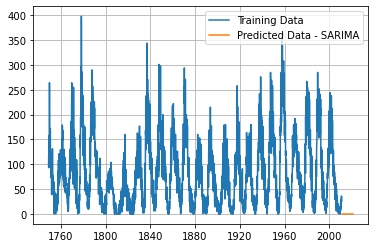

In [196]:
plt.plot(df_train,label='Training Data')
plt.plot(df_test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [197]:
pd.DataFrame({'Month':SARIMA_predictions.index, 'Avg_sunspot_count':SARIMA_predictions.values}).to_csv('SourabhKumar_Submission21.csv', header  = ['Month','Avg_sunspot_count'])